In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl

# MATHMOD:LAB1 | Example

In [2]:
# observation data
obs = np.array([
    12.85, 154.77,
    12.32, 145.59,
    11.43, 108.37,
    10.59, 100.76,
    10.21, 98.32,
    9.65, 81.43,
    9.63, 80.97,
    9.22, 79.04
]).reshape(-1,2).T

X = obs[0,:]
Y = obs[1,:]
obs

array([[ 12.85,  12.32,  11.43,  10.59,  10.21,   9.65,   9.63,   9.22],
       [154.77, 145.59, 108.37, 100.76,  98.32,  81.43,  80.97,  79.04]])

### Utilities

In [3]:
def corr2(A,B):
    A = A-A.mean()
    B = B-B.mean()
    return (A*B).sum()**2 / ((A*A).sum() * (B*B).sum())

DIGITS = 10

In [26]:
r = np.sqrt(corr2(X, Y))
print(r)
if r>0.8: print("Possible linear dependance indeed")

0.9788057434897875
Possible linear dependance indeed


Must be 0.978806. 

### Linear regression


We want to find $a_1, a_2$ for $y(x) = a_1 + a_2 x$

![Screenshot_2.png](Screenshot_2.png)


Thus, we have a matrix equation:
$$
\begin{pmatrix}
   n & \text{x.sum()} \\
   \text{x.sum()} & \text{(x**2).sum()}
\end{pmatrix} 
\begin{pmatrix} a_1 \\ a_2 \end{pmatrix} = \begin{pmatrix} \text{y.sum()} \\ \text{x*y} \end{pmatrix}
$$
That is,
$$
\begin{pmatrix} a_1 \\ a_2 \end{pmatrix} = \begin{pmatrix}
   n & \text{x.sum()} \\
   \text{x.sum()} & \text{(x**2).sum()}
\end{pmatrix} ^{-1} \begin{pmatrix} \text{y.sum()} \\ \text{x*y} \end{pmatrix}
$$


In [5]:
# matrix
A = np.array([[X.shape[0], X.sum()], [X.sum(), (X*X).sum()]])
# coefs / weights
a = la.inv(A) * np.matrix([Y.sum(), (X*Y).sum()]).T
a = np.round(a, DIGITS)
a

array([[-124.38688702],
       [  21.4708393 ]])

Must be 
$$
a_1 = -124,4 \\
a_2 = 21,5
$$

So,

In [6]:
def f1(x):
    return a[0] + a[1]*x

### Analysis ($R^2$)

In [7]:
def R2(Y,Y1): 
    return 1 - ((Y-Y1)**2).sum() / ((Y-Y.mean())**2).sum()

**1. Our method**

In [8]:
Y1 = f1(X)

data = np.vstack([X,Y,Y1])
print(data)
r2 = R2(Y,Y1)
print("R2 =", r2)

[[ 12.85        12.32        11.43        10.59        10.21
    9.65         9.63         9.22      ]
 [154.77       145.59       108.37       100.76        98.32
   81.43        80.97        79.04      ]
 [151.51339803 140.1338532  121.02480622 102.9893012   94.83038227
   82.80671226  82.37729547  73.57425136]]
R2 = 0.9580606834885963


**2. NumPy method** (rounded to 4 digits after decimal dot)

In [9]:
f2 = np.polynomial.Polynomial(np.round(np.polynomial.Polynomial.fit(X,Y,1).convert().coef, DIGITS))
f2.coef

array([-124.38688702,   21.4708393 ])

In [11]:
Y2 = f2(X)

data = np.vstack([X,Y,Y2])
print(data)
r2 = R2(Y,Y2)

print("R2 =", r2)

[[ 12.85        12.32        11.43        10.59        10.21
    9.65         9.63         9.22      ]
 [154.77       145.59       108.37       100.76        98.32
   81.43        80.97        79.04      ]
 [151.51339803 140.1338532  121.02480622 102.9893012   94.83038227
   82.80671226  82.37729547  73.57425136]]
R2 = 0.9580606834885963


**3. Graph**

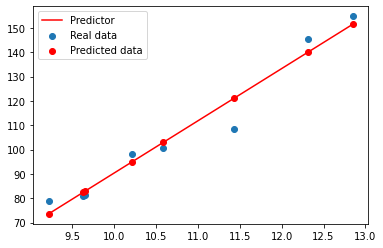

In [28]:
plt.scatter(X, Y, label='Real data')
l = np.linspace(X.min(), X.max(), 100)
plt.plot(l, f1(l), c='r', label='Predictor')
plt.scatter(X, Y1, c='r', label='Predicted data')
plt.legend()

### Results

1. Both methods gave the same results (predictor coeffitients) up to the 10+ decimal digits
2. R^2 = 0.958. That is, model is appliable